## Actividad Semana 3 - Pregunta 3
**Pregunta 3**
Se presenta a continuación el ejercicio tomando como ejemoplo una implementación econtrada en la wen donde se ejemplifica el uso del backpropagation para aprender la tabla XOR.
Dadas las entradas X0 y X1, predecir la salida Y.

| X0 | X1 | Y |
|----|----|---|
| 0  |  0 | 0 |
| 0  | 1  | 1 |
| 1  | 0  | 1 |
| 1  | 1  | 0 |

In [84]:
import numpy as np
import matplotlib.pyplot as plt

Se crea una clase que va a contener las propiedades y métodos de la red neuronal.

In [85]:
class NeuralNetwork:
    def __init__(self, layers, alpha=0.1):
        #Se inicializa la red con los parámetros de entrada
        #Como la matriz de pesos la cantidad de capas y el rango de aprendizaje
        self.W = []
        self.layers = layers
        self.alpha = alpha
        self.epoch_data = []
        self.loss_data = []

        #En este loop se recorre del indice de la primera capa pero se detiene antes de llegar a las últimas dos capas
        for i in np.arange(0, len(layers) - 2):
            #Se inicializa la matriz de peso de forma aleatoria
            w = np.random.randn(layers[i] + 1, layers[i + 1] + 1)
            self.W.append(w / np.sqrt(layers[i]))
            w = np.random.randn(layers[-2] + 1, layers[-1])
            self.W.append(w / np.sqrt(layers[-2]))

    #Se define la función de activación
    def sigmoid(self, x):
        return 1/(1+np.exp(-x))

    #Se define la función de activación derivada
    def sigmoid_deriv(self, x):
        return x * (1 - x)

    #Esta función será la responsable de entrenar a la red neural
    def fit(self, X, y, epochs=1000, displayUpdate=100):
        #Se inserta una columna de 1's al final de la matriz de entrada para que la capa de entrada tenga una entrada de bias
        X = np.c_[X, np.ones((X.shape[0]))]

        #Se cicla entre el número de epochs
        for epoch in np.arange(0, epochs):
            #Se cicla entre cada dato y se entrena la red para ese dato
            for (x, target) in zip(X, y):
                self.fit_partial(x, target)

                #Aquí se decide si mostrar o no el resultado de cada epoch
                if epoch == 0 or (epoch + 1) % displayUpdate == 0:
                    loss = self.calculate_loss(X, y)
                    print("Epoch: {}".format(epoch + 1), "Loss: {:.2f}".format(loss))
            #Se guardan los datos del epoch y la pérdida para la gráfica
            self.epoch_data.append(epoch)
            self.loss_data.append(loss)

    #Esta función contiene el algoritmo de propagacion hacia atrás de la red
    def fit_partial(self, x, y):
        A = [np.atleast_2d(x)]

        #Esta parte es la propagación hacia adelante
        for layer in np.arange(0, len(self.W)):
            #Con esto se calcula la entrada neta con el producto punto entre la activación anterior y el peso
            net = A[layer].dot(self.W[layer])
            #Para obtener la salida neta se aplica la función de activación
            out = self.sigmoid(net)
            #La salida se agrega a la lista de activaciones
            A.append(out)

            #Esta parte es la propagación hacia atrás
            #Se obtiene la diferencia entre la salida y el valor deseado
            error =A[-1] - y

            #Aquí se aplica la regla de la cadena para calcular el gradiente
            #La primera entrada es el error de la capa de salida multiplicado por la función de activación derivada
            D = [error * self.sigmoid_deriv(A[-1])]

            #Aqui se recorren las capas hacia atrás ignorando las dos últimas
            for layer in np.arange(len(A) - 2, 0, -1):
                #El gradiente de la capa actual es igual al gradiente de la capa anterior
                # multiplicado por la matriz de pesos de la capa actual
                #y multiplicado por la función de activación derivada de la capa actual
                delta = D[-1].dot(self.W[layer].T)
                delta = delta * self.sigmoid_deriv(A[layer])
                D.append(delta)
                #Como se cicló hacia atrás, se cambia el orden de la lista
                D = D[::-1]
                #Fase de actualización de los pesos
                for layer in np.arange(0, len(self.W)):
                    # Se actualizan los pesos de la capa actual multiplicando las capas de activacion por el gradiente
                    #y multiplicando este valor por el rango de aprendizaje agregando la matriz de pesos
                    #En este punto es donde se realiza el aprendizaje
                    self.W[layer] += -self.alpha * A[layer].T.dot(D[layer])

    def predict(self, X, addBias=True):
        #Se inicializa la predicción que será propagada hacia adelante para obtener la predicción final
        p = np.atleast_2d(X)
        #Se valida si se requiere la adición de una entrada de bias
        if addBias:
            #se inserta una columna de 1's al final de la matriz de entrada para que la capa de entrada tenga una entrada de bias
            p = np.c_[p, np.ones((p.shape[0]))]

        for layer in np.arange(0, len(self.W)):
            #Se obtiene la predicción de salida con el producto punto entre la activación actual y el peso
            #Y se envía a la función de activación
            p = self.sigmoid(np.dot(p, self.W[layer]))
        return p

    #Se calcula la pérdida de todo el set de datos
    def calculate_loss(self, X, targets):
        targets = np.atleast_2d(targets)
        predictions = self.predict(X, addBias=False)
        loss = 0.5 * np.sum((predictions - targets) ** 2)
        return loss

In [86]:

#Aqui se definen los parametros para el entrenamiento del set para XOR
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])
#Se define una red neuronal con 2 capas ocultas y una de salida
nn = NeuralNetwork([2, 2, 1], alpha=0.5)
#Se definen 20000 epochs para el entrenamiento
nn.fit(X, y, epochs=20000)

Epoch: 1 Loss: 0.50
Epoch: 1 Loss: 0.50
Epoch: 1 Loss: 0.51
Epoch: 1 Loss: 0.50
Epoch: 100 Loss: 0.49
Epoch: 100 Loss: 0.49
Epoch: 100 Loss: 0.49
Epoch: 100 Loss: 0.49
Epoch: 200 Loss: 0.46
Epoch: 200 Loss: 0.46
Epoch: 200 Loss: 0.46
Epoch: 200 Loss: 0.46
Epoch: 300 Loss: 0.36
Epoch: 300 Loss: 0.36
Epoch: 300 Loss: 0.36
Epoch: 300 Loss: 0.36
Epoch: 400 Loss: 0.16
Epoch: 400 Loss: 0.16
Epoch: 400 Loss: 0.16
Epoch: 400 Loss: 0.16
Epoch: 500 Loss: 0.07
Epoch: 500 Loss: 0.07
Epoch: 500 Loss: 0.07
Epoch: 500 Loss: 0.07
Epoch: 600 Loss: 0.04
Epoch: 600 Loss: 0.04
Epoch: 600 Loss: 0.04
Epoch: 600 Loss: 0.04
Epoch: 700 Loss: 0.02
Epoch: 700 Loss: 0.02
Epoch: 700 Loss: 0.02
Epoch: 700 Loss: 0.02
Epoch: 800 Loss: 0.02
Epoch: 800 Loss: 0.02
Epoch: 800 Loss: 0.02
Epoch: 800 Loss: 0.02
Epoch: 900 Loss: 0.01
Epoch: 900 Loss: 0.01
Epoch: 900 Loss: 0.01
Epoch: 900 Loss: 0.01
Epoch: 1000 Loss: 0.01
Epoch: 1000 Loss: 0.01
Epoch: 1000 Loss: 0.01
Epoch: 1000 Loss: 0.01
Epoch: 1100 Loss: 0.01
Epoch: 1100 L

In [87]:
#Se hace un ciclo entre los datos de prueba del set para XOR
for (x, target) in zip(X, y):
    #Se calcula la predicción de la red para cada dato
    pred = nn.predict(x)[0][0]
    step = 1 if pred > 0.5 else 0
    print("[INFO] data={}, ground-truth={}, pred={:.4f}, step={}".format(x, target[0], pred, step))
    #En los resultados se puede notar que la red aprendió correctamente el patrón de XOR

[INFO] data=[0 0], ground-truth=0, pred=0.0107, step=0
[INFO] data=[0 1], ground-truth=1, pred=0.9924, step=1
[INFO] data=[1 0], ground-truth=1, pred=0.9891, step=1
[INFO] data=[1 1], ground-truth=0, pred=0.0096, step=0


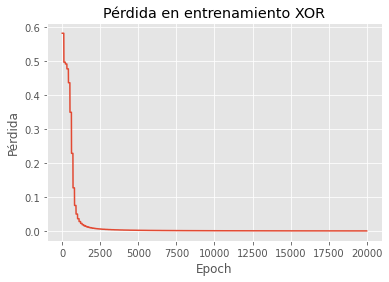

In [83]:
#Se grafiga la pérdida para cada epoch
plt.style.use("ggplot")
plt.figure()
plt.plot(nn.epoch_data, nn.loss_data)


plt.title('Pérdida en entrenamiento XOR')
plt.xlabel('Epoch')
plt.ylabel('Pérdida')
plt.show()